In [1]:
#simon-periodicity-algorithm
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

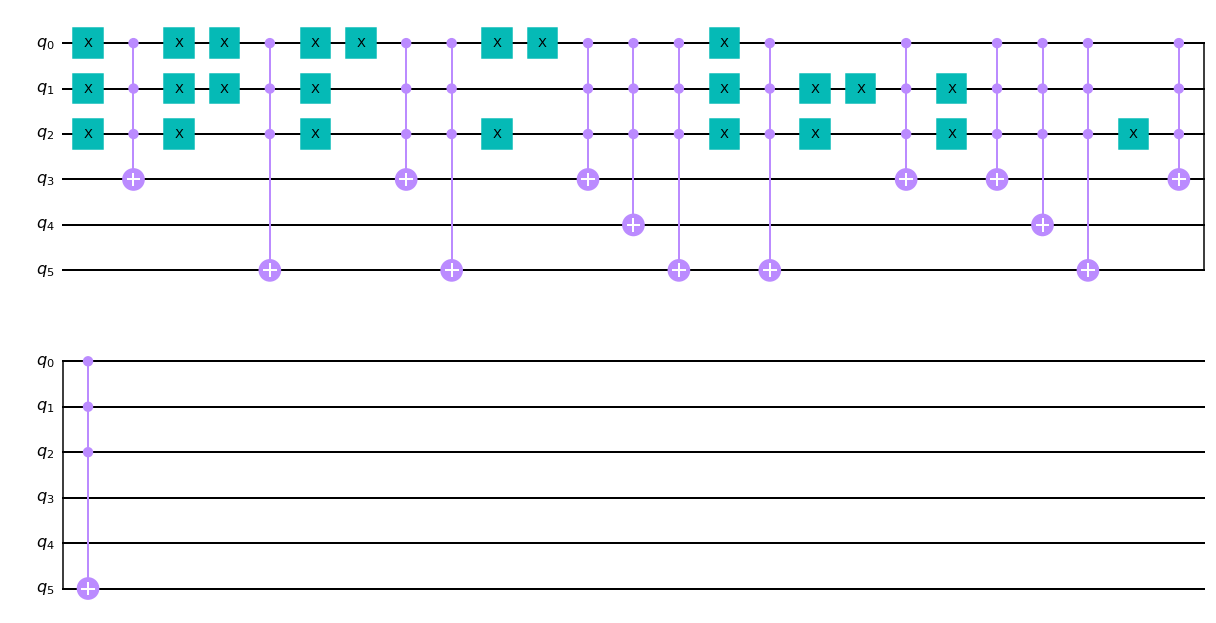

In [2]:
#creamos un oraculo con ayuda de las puertas X(NOT)
#y las puertas controladas de X

#periodo: c = 101
#estado de los qubits medidos: 000, 010, 101, 111
oracle = QuantumCircuit(6, name='oracle')
oracle.x(range(3))
oracle.mcx([0,1,2],3)
oracle.x(range(3))

#oracle.barrier()

oracle.x(range(2))
oracle.mcx([0,1,2],5)
oracle.x(range(2))

#oracle.barrier()

oracle.x([0,2])
oracle.mcx([0,1,2],3)
oracle.mcx([0,1,2],5)
oracle.x([0,2])

#oracle.barrier()

oracle.x(0)
oracle.mcx([0,1,2],3)
oracle.mcx([0,1,2],4)
oracle.mcx([0,1,2],5)
oracle.x(0)

#oracle.barrier()

oracle.x([1,2])
oracle.mcx([0,1,2],5)
oracle.x([1,2])

#oracle.barrier()

oracle.x(1)
oracle.mcx([0,1,2],3)
oracle.x(1)

#oracle.barrier()

oracle.x(2)
oracle.mcx([0,1,2],3)
oracle.mcx([0,1,2],4)
oracle.mcx([0,1,2],5)
oracle.x(2)

#oracle.barrier()

oracle.mcx([0,1,2],3)
oracle.mcx([0,1,2],5)

simon_oracle = oracle.to_gate()
simon_oracle.name = 'simon oracle'

oracle.draw('mpl')

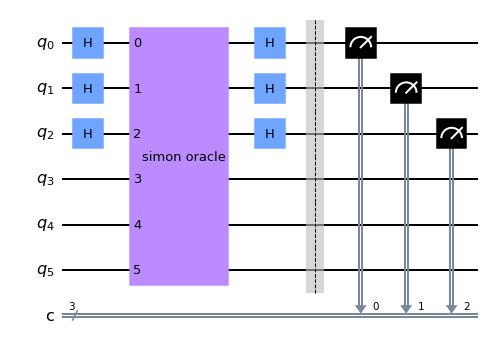

In [3]:
#creamos el circuito con el oraculo
qc = QuantumCircuit(6,3)
qc.h(range(3))
qc.append(simon_oracle,range(6))
qc.h(range(3))

qc.barrier()
qc.measure(range(3),range(3))

qc.draw('mpl')

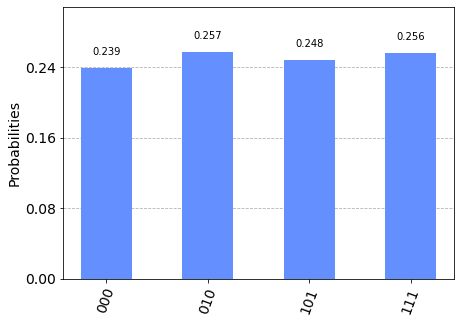

In [113]:
#ejecución
backend = QasmSimulator()
job = backend.run(transpile(qc, backend), shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)
#se obtiene los resultados esperados